In [1]:
import json
import pandas

In [2]:
with open("results.json") as json_file:
    results = json.loads(json_file.read())

In [3]:
pci = results['3']

In [4]:
pci_data = pandas.DataFrame.from_dict(pci['Data'])

In [5]:
pci_data.head()

,Code,GeoFips,GeoName,TimePeriod,CL_UNIT,UNIT_MULT,DataValue
0,CAINC1-3,00000,United States,1969,Dollars,0,"3,931"
1,CAINC1-3,00000,United States,1970,Dollars,0,"4,198"
2,CAINC1-3,00000,United States,1971,Dollars,0,"4,471"
3,CAINC1-3,00000,United States,1972,Dollars,0,"4,857"
4,CAINC1-3,00000,United States,1973,Dollars,0,"5,363"


In [6]:
pci_data['pci'] = pci_data.DataValue.str.replace(",","").astype(int)

In [7]:
pci_data.head()

,Code,GeoFips,GeoName,TimePeriod,CL_UNIT,UNIT_MULT,DataValue,pci
0,CAINC1-3,00000,United States,1969,Dollars,0,"3,931",3931
1,CAINC1-3,00000,United States,1970,Dollars,0,"4,198",4198
2,CAINC1-3,00000,United States,1971,Dollars,0,"4,471",4471
3,CAINC1-3,00000,United States,1972,Dollars,0,"4,857",4857
4,CAINC1-3,00000,United States,1973,Dollars,0,"5,363",5363


In [8]:
pci_data.pci

0        3931
1        4198
2        4471
3        4857
4        5363
        ...  
2995    50862
2996    53993
2997    55805
2998    58149
2999    61378
Name: pci, Length: 3000, dtype: int64

In [9]:
df = pci_data[['GeoFips', 'GeoName', "TimePeriod", 'pci']]

In [10]:
df.head()

,GeoFips,GeoName,TimePeriod,pci
0,00000,United States,1969,3931
1,00000,United States,1970,4198
2,00000,United States,1971,4471
3,00000,United States,1972,4857
4,00000,United States,1973,5363


In [11]:
df1 = df.pivot(index="GeoFips", columns='TimePeriod', values='pci')

In [12]:
df1.head()

TimePeriod,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
GeoFips,,,,,,,,,,,,,,,,,,,,,
00000,3931,4198,4471,4857,5363,5836,6324,6875,7516,8356,...,39284,40546,42735,44599,44851,47058,48978,49870,51885,54446
01000,2831,3081,3345,3672,4088,4477,4918,5438,5920,6609,...,32608,33752,34997,35884,36107,37266,38644,39224,40467,42238
02000,5322,5911,6269,6636,7525,8827,11205,12447,12789,13018,...,47069,49438,52390,53627,52723,55833,57583,56016,56794,59420
04000,3643,4020,4354,4711,5145,5546,5825,6309,6858,7768,...,33418,33635,34968,36123,36602,38226,39676,40671,42505,44329
05000,2681,2915,3176,3504,4069,4453,4769,5247,5736,6546,...,31153,31927,33863,36240,36235,38260,39343,40148,41520,43233


In [13]:
df1.shape

(60, 50)

In [14]:
import geopandas

In [15]:
!ls

'BEA Data (local).ipynb'   tl_2019_us_state.dbf
'BEA Data Request.ipynb'   tl_2019_us_state.prj
 data.csv		   tl_2019_us_state.shp
 pcinc.ipynb		   tl_2019_us_state.shp.ea.iso.xml
 results.json		   tl_2019_us_state.shp.iso.xml
 tl_2019_us_state.cpg	   tl_2019_us_state.shx


In [16]:
shp = geopandas.read_file("tl_2019_us_state.shp")

In [17]:
shp.head()

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266231560,489271086,+38.6472854,-080.6183274,"POLYGON ((-81.74725 39.09538, -81.74635 39.096..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138947364717,31362872853,+28.4574302,-082.4091477,"MULTIPOLYGON (((-86.38865 30.99418, -86.38385 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143779863817,6215723896,+40.1028754,-089.1526108,"POLYGON ((-91.18529 40.63780, -91.17510 40.643..."
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206230065476,18942261495,+46.3159573,-094.1996043,"POLYGON ((-96.78438 46.63050, -96.78434 46.630..."
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25151726296,6979340970,+38.9466584,-076.6744939,"POLYGON ((-77.45881 39.22027, -77.45866 39.220..."


In [18]:
shp.shape

(56, 15)

In [54]:
shp['GeoFips'] = [f'{fips}000' for fips in shp.STATEFP]
df1['fips'] = df1.index

In [55]:
gdf = shp.merge(df1, left_on='GeoFips', right_on='fips')

In [56]:
gdf.head()

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,...,2011,2012,2013,2014,2015,2016,2017,2018,GeoFips_y,fips
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,...,34131,35118,34946,36153,36915,36931,38644,40873,54000,54000
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,...,40047,41055,40659,43109,45287,45684,47869,50070,12000,12000
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,...,44140,46044,47113,49444,51519,52273,53943,56839,17000,17000
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,...,45353,47860,47941,50254,52315,53209,54919,57515,27000,27000
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,...,52437,53546,53052,54687,57139,59029,60512,63354,24000,24000


In [57]:
gdf.shape

(51, 68)

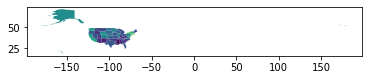

In [59]:
gdf.plot(column='2018')

In [60]:
gdf.NAME

0            West Virginia
1                  Florida
2                 Illinois
3                Minnesota
4                 Maryland
5             Rhode Island
6                    Idaho
7            New Hampshire
8           North Carolina
9                  Vermont
10             Connecticut
11                Delaware
12              New Mexico
13              California
14              New Jersey
15               Wisconsin
16                  Oregon
17                Nebraska
18            Pennsylvania
19              Washington
20               Louisiana
21                 Georgia
22                 Alabama
23                    Utah
24                    Ohio
25                   Texas
26                Colorado
27          South Carolina
28                Oklahoma
29               Tennessee
30                 Wyoming
31                  Hawaii
32            North Dakota
33                Kentucky
34                   Maine
35                New York
36                  Nevada
3

In [63]:
drop_names = ['Hawaii', 'Alaska']
gdf = gdf[~gdf.NAME.isin(drop_names)]

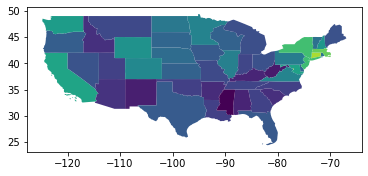

In [64]:
gdf.plot(column='2018')

In [65]:
gdf.to_file('pcinc.shp')